In [1]:
#KNN for Classification
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
!pip install "pandas<2.0.0"

from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
                                                  

In [2]:
data_for_model = pickle.load(open(r"C:\Users\19144\OneDrive\Desktop\Data Science Infinity\Python Fundamentals\Pickle files\abc_classification_modelling.p", "rb")) #rb for reading a file in


In [3]:
data_for_model

,customer_id,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,74,1,3.38,F,0.59,1586.89,195,26,5,61.034231
1,524,1,4.76,F,0.52,2397.26,258,27,5,88.787407
2,607,1,4.45,F,0.49,1279.91,183,22,5,58.177727
3,343,0,0.91,M,0.54,967.14,102,17,5,56.890588
4,322,1,3.02,F,0.63,1566.35,182,30,5,52.211667
...,...,...,...,...,...,...,...,...,...,...
855,372,1,4.38,F,0.50,1381.28,103,12,5,115.106667
856,104,1,2.36,F,0.63,1464.62,127,22,5,66.573636
857,393,1,1.87,M,0.59,2213.97,191,38,5,58.262368
858,373,0,0.21,M,0.47,1446.00,133,22,5,65.727273


In [4]:
data_for_model

,customer_id,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,74,1,3.38,F,0.59,1586.89,195,26,5,61.034231
1,524,1,4.76,F,0.52,2397.26,258,27,5,88.787407
2,607,1,4.45,F,0.49,1279.91,183,22,5,58.177727
3,343,0,0.91,M,0.54,967.14,102,17,5,56.890588
4,322,1,3.02,F,0.63,1566.35,182,30,5,52.211667
...,...,...,...,...,...,...,...,...,...,...
855,372,1,4.38,F,0.50,1381.28,103,12,5,115.106667
856,104,1,2.36,F,0.63,1464.62,127,22,5,66.573636
857,393,1,1.87,M,0.59,2213.97,191,38,5,58.262368
858,373,0,0.21,M,0.47,1446.00,133,22,5,65.727273


In [5]:
data_for_model.drop("customer_id", axis=1, inplace=True) #True so that it is applied


In [6]:
#Shuffle data
#Best practice step
#This aids us in being sensitive to how data is organized - it may or may not have an impact on the model itself
data_for_model = shuffle(data_for_model, random_state=42)

In [7]:
#Class Balance - we need to think about how label/DV is balanced here
data_for_model["signup_flag"].value_counts()

signup_flag
0    593
1    267
Name: count, dtype: int64

In [8]:
data_for_model["signup_flag"].value_counts(normalize=True)

signup_flag
0    0.689535
1    0.310465
Name: proportion, dtype: float64

In [9]:
data_for_model

,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
714,0,1.64,M,0.58,27.81,6,3,3,9.270000
605,0,0.88,M,0.63,26.62,9,3,2,8.873333
120,0,0.56,M,0.62,886.78,154,18,4,49.265556
208,0,0.11,M,0.58,1256.19,168,34,5,36.946765
380,0,1.32,M,0.36,739.67,110,21,3,35.222381
...,...,...,...,...,...,...,...,...,...
71,0,0.07,M,0.57,746.15,133,24,5,31.089583
106,0,1.96,F,0.60,881.49,166,24,4,36.728750
270,0,1.59,M,0.50,319.37,85,17,5,18.786471
435,0,0.71,F,0.54,273.94,74,20,4,13.697000


In [10]:
#Dealing with missing values
data_for_model.isna().sum()

signup_flag             0
distance_from_store     5
gender                  5
credit_score            8
total_sales             0
total_items             0
transaction_count       0
product_area_count      0
average_basket_value    0
dtype: int64

In [11]:
data_for_model.dropna(how = "any", inplace=True) #If any missing values, then whole row is dropped, True so that it is applied

In [12]:
data_for_model.shape

(847, 9)

In [13]:
#Deal with outliers
outlier_investigation = data_for_model.describe()

In [14]:
outlier_investigation

,signup_flag,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,0.304604,2.614545,0.597521,968.166411,143.877214,22.214876,4.177096,38.034161
std,0.460512,14.397590,0.102264,1073.647531,125.342694,11.721699,0.920887,24.243691
min,0.000000,0.000000,0.260000,2.090000,1.000000,1.000000,1.000000,2.090000
25%,0.000000,0.730000,0.530000,383.940000,77.000000,16.000000,4.000000,21.734700
50%,0.000000,1.640000,0.590000,691.640000,123.000000,23.000000,4.000000,31.069333
75%,1.000000,2.920000,0.670000,1121.530000,170.500000,28.000000,5.000000,46.429973
max,1.000000,400.970000,0.880000,7372.060000,910.000000,75.000000,5.000000,141.054091


In [15]:
#Approach 1 - Boxplot approach

outlier_columns = ["distance_from_store", "total_sales", "total_items"]

for column in outlier_columns:
    lower_quartile = data_for_model[column].quantile(0.25) #25 percentile/lower quartile
    upper_quartile = data_for_model[column].quantile(0.75) #25 percentile/lower quartile
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr*2 #Widened from 1.5 because I don't want to cut out too many outliers
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended
    
    outliers = data_for_model[(data_for_model[column] < min_border) | (data_for_model[column] > max_border)].index

    print(f"{len(outliers)} outliers detected in column {column}")
    
    data_for_model.drop(outliers, inplace =True)

8 outliers detected in column distance_from_store
54 outliers detected in column total_sales
3 outliers detected in column total_items


In [16]:
data_for_model

,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
714,0,1.64,M,0.58,27.81,6,3,3,9.270000
605,0,0.88,M,0.63,26.62,9,3,2,8.873333
120,0,0.56,M,0.62,886.78,154,18,4,49.265556
208,0,0.11,M,0.58,1256.19,168,34,5,36.946765
380,0,1.32,M,0.36,739.67,110,21,3,35.222381
...,...,...,...,...,...,...,...,...,...
71,0,0.07,M,0.57,746.15,133,24,5,31.089583
106,0,1.96,F,0.60,881.49,166,24,4,36.728750
270,0,1.59,M,0.50,319.37,85,17,5,18.786471
435,0,0.71,F,0.54,273.94,74,20,4,13.697000


In [17]:
#We had 394 rows, now we are down to 369 rows

In [18]:
#Split input variables and output variables
X = data_for_model.drop(["signup_flag"], axis=1)
y = data_for_model["signup_flag"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y) #stratify=y this means training and test sets have same proportion of 0s and 1s as overall data 

In [19]:
#Deal with categorical variables
categorical_vars = ["gender"]

one_hot_encoder = OneHotEncoder(sparse=False, drop="first") #Drop first encoded column to avoid dummy trap

X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_vars]) #Want to use fit transform on training data, but transform only on test data 
#Want encoding rules learned on training, and then applied on testing - rules will remain the same
X_test_encoded = one_hot_encoder.transform(X_test[categorical_vars]) 

encoder_feature_names = one_hot_encoder.get_feature_names_out(input_features=categorical_vars)

# Run for x_train
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder_feature_names)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_train.drop(categorical_vars, axis=1, inplace=True)

# Run for x_test
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder_feature_names)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)
X_test.drop(categorical_vars, axis=1, inplace=True)


C:\Users\19144\anaconda4\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [20]:
X_train #gender is now binary 1s and 0s, and we only have gender_M because of the dummy variable trap

,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value,gender_M
0,0.07,0.57,746.15,133,24,5,31.089583,1.0
1,0.20,0.57,585.46,128,32,4,18.295625,1.0
2,3.07,0.53,1151.24,226,35,5,32.892571,0.0
3,2.86,0.77,14.03,8,2,2,7.015000,0.0
4,0.52,0.52,656.48,121,16,3,41.030000,1.0
...,...,...,...,...,...,...,...,...
620,0.39,0.72,564.47,146,25,4,22.578800,1.0
621,1.62,0.72,793.91,171,20,3,39.695500,1.0
622,2.60,0.65,847.01,123,22,5,38.500455,0.0
623,0.36,0.45,924.07,189,20,3,46.203500,1.0


In [21]:
#Feature scaling
#Normalizing means data exists 0-1, this will be comparable to categorical variables, too
scale_norm = MinMaxScaler()
X_train = pd.DataFrame(scale_norm.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scale_norm.transform(X_test), columns = X_test.columns)
#Be sure to use fit transform on training data, transform on test
#This means that scaling rules are learned from training data, and then applied to all other data

In [22]:
X_train #All data points are converted between 0-1 based on normalization

,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value,gender_M
0,0.014028,0.500000,0.296080,0.416404,0.560976,1.00,0.284911,1.0
1,0.040080,0.500000,0.232113,0.400631,0.756098,0.75,0.157989,1.0
2,0.615230,0.435484,0.457336,0.709779,0.829268,1.00,0.302798,0.0
3,0.573146,0.822581,0.004642,0.022082,0.024390,0.25,0.046080,0.0
4,0.104208,0.419355,0.260385,0.378549,0.365854,0.50,0.383524,1.0
...,...,...,...,...,...,...,...,...
620,0.078156,0.741935,0.223758,0.457413,0.585366,0.75,0.200480,1.0
621,0.324649,0.741935,0.315092,0.536278,0.463415,0.50,0.370286,1.0
622,0.521042,0.629032,0.336230,0.384858,0.512195,1.00,0.358430,0.0
623,0.072144,0.306452,0.366906,0.593060,0.463415,0.50,0.434848,1.0


In [24]:
#Feature selection
#Algorithm treats each input as equally important in KNN...no feature importance...so spread of data is really important to consider
#Algorithm has to process more information...anyway to reduce noise is critical

clf = RandomForestClassifier(random_state=42) #max_iter - number of iterations to find optimal regression line
feature_selector = RFECV(clf)
#By default, cross validation uses 5 chunks of data to analyze
#Cross validation  - split into 5, training on model on 4, and validating model on remaining chunk
#Powerful way to validate model

fit = feature_selector.fit(X_train,y_train) #These are objects that have had our data prep applied to

optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

X_train = X_train.loc[:, feature_selector.get_support()]
X_test = X_test.loc[:, feature_selector.get_support()]
#6 optimal variables 
#Through cross validation - input3 and input4 were not useful here

Optimal number of features: 6


In [25]:
X_train #Looks like total sales has been dropped here

,distance_from_store,total_sales,transaction_count,product_area_count,average_basket_value,gender_M
0,0.014028,0.296080,0.560976,1.00,0.284911,1.0
1,0.040080,0.232113,0.756098,0.75,0.157989,1.0
2,0.615230,0.457336,0.829268,1.00,0.302798,0.0
3,0.573146,0.004642,0.024390,0.25,0.046080,0.0
4,0.104208,0.260385,0.365854,0.50,0.383524,1.0
...,...,...,...,...,...,...
620,0.078156,0.223758,0.585366,0.75,0.200480,1.0
621,0.324649,0.315092,0.463415,0.50,0.370286,1.0
622,0.521042,0.336230,0.512195,1.00,0.358430,0.0
623,0.072144,0.366906,0.463415,0.50,0.434848,1.0


Text(0.5, 1.0, 'Feature Selection using RFE \n Optimal number of features is 6 (at score of 0.9472)')

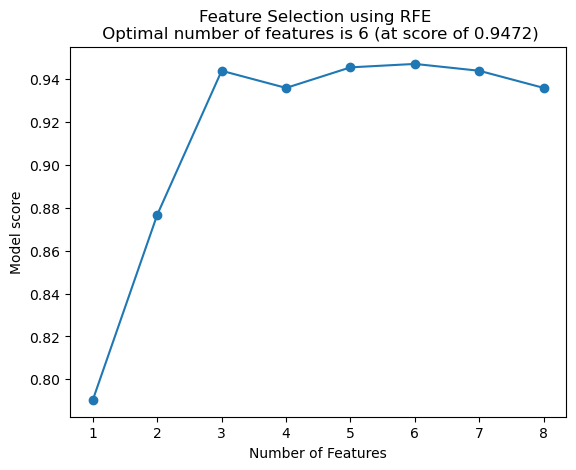

In [26]:
plt.plot(range(1, len(fit.cv_results_['mean_test_score']) + 1), fit.cv_results_['mean_test_score'], marker="o")
plt.ylabel("Model score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.cv_results_['mean_test_score']), 4)})")



In [27]:
X_train
#Don't have total items column, or credit score...now down to 6 variables

,distance_from_store,total_sales,transaction_count,product_area_count,average_basket_value,gender_M
0,0.014028,0.296080,0.560976,1.00,0.284911,1.0
1,0.040080,0.232113,0.756098,0.75,0.157989,1.0
2,0.615230,0.457336,0.829268,1.00,0.302798,0.0
3,0.573146,0.004642,0.024390,0.25,0.046080,0.0
4,0.104208,0.260385,0.365854,0.50,0.383524,1.0
...,...,...,...,...,...,...
620,0.078156,0.223758,0.585366,0.75,0.200480,1.0
621,0.324649,0.315092,0.463415,0.50,0.370286,1.0
622,0.521042,0.336230,0.512195,1.00,0.358430,0.0
623,0.072144,0.366906,0.463415,0.50,0.434848,1.0


In [28]:
#Model Training
clf = KNeighborsClassifier() #Don't need random state 42 - should calculate same result, as this is based on distance between data points
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
#Model assessment
y_pred_class = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test) #Class predicted probabilties

In [30]:
y_pred_class #This is full of 0s and 1s depending on which class data point is predicted to be in

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [31]:
y_pred_prob
#Probabilities that each data point belongs in either class

array([[1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. ,

In [32]:
#We need just prob of consumer being in class 1 = positive
y_pred_prob = clf.predict_proba(X_test)[:,1]
y_pred_prob

array([0. , 0. , 1. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0.2, 0. , 0.2, 0. , 0. , 0. , 0. , 0.2, 0.4, 0.4, 1. , 0. , 0. ,
       0.2, 0.2, 0.4, 0. , 1. , 1. , 0.4, 0. , 0. , 0. , 1. , 0. , 0. ,
       0.8, 0. , 0. , 0. , 0.2, 0. , 0.2, 0.6, 0. , 0.4, 0. , 0. , 0. ,
       0. , 0. , 0.4, 0.2, 1. , 0.2, 0. , 0.6, 1. , 0. , 0.2, 0.2, 0.2,
       0. , 0. , 0. , 0.4, 0. , 1. , 0. , 0. , 0. , 0. , 0.6, 1. , 0.6,
       0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 1. , 0. , 0. , 0. ,
       0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0.8, 0.4, 0.6, 0. , 0. , 1. ,
       0. , 0.6, 0.2, 1. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ,
       0. , 1. , 0. , 0.6, 0. , 0. , 1. , 0. , 1. , 0.4, 0. , 1. , 0. ,
       0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 1. ,
       0. ])

C:\Users\19144\AppData\Local\Temp\ipykernel_9424\1092678375.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


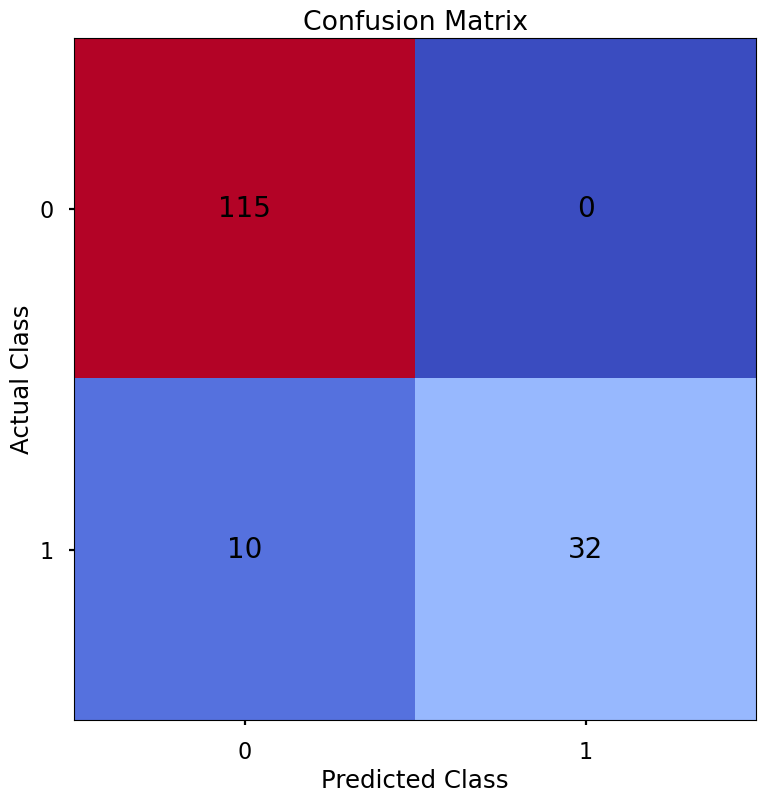

In [33]:
#Confusion matrix

conf_matrix = confusion_matrix(y_test,y_pred_class)

plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap="coolwarm")
plt.gca().xaxis.tick_bottom()#Moves text from top of chart to the bottom
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
for (i,j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j, i, corr_value, ha = "center", va = "center", fontsize = 20)
plt.show()

In [34]:
#Accuracy (the numebr of correct classification out of all attempted classifications)
accuracy_score(y_test,y_pred_class)

0.9363057324840764

In [35]:
#Classification accuracy score of 93.6%
#But slight imbalance in data set

#Precision (of all observations that were predicted as positive, how many were actually positive)
precision_score(y_test,y_pred_class)
#Each time we predicted a positive class, we were right 100% of the time - This is based on having no 0s in the false positives square.

1.0

In [36]:
#Recall (of all positive observations, how many did we predict as positive)
recall_score(y_test, y_pred_class)

#Out of all the actual positive cases, the model correctly identified 76.1% of them.

0.7619047619047619

In [37]:
#F1 score (the harmonic mean of precision and recall)
f1_score(y_test,y_pred_class)
#86.48% - this is important to measure, especially since data is imbalanced
#This is penalized a little bit, as there is an imbalance between false negatives and false positives (10, 0)

0.8648648648648648

In [44]:
#Finding the optimal value of k
k_list = list(range(2,25))
accuracy_scores = []

for k in k_list:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = f1_score(y_test,y_pred)
    accuracy_scores.append(accuracy)

In [45]:
accuracy_scores

[0.8333333333333333,
 0.8533333333333334,
 0.8169014084507042,
 0.8648648648648648,
 0.8,
 0.7887323943661971,
 0.782608695652174,
 0.782608695652174,
 0.7647058823529412,
 0.7647058823529412,
 0.7647058823529412,
 0.7647058823529412,
 0.7462686567164178,
 0.7462686567164178,
 0.7076923076923077,
 0.7462686567164178,
 0.6875000000000001,
 0.7076923076923077,
 0.7076923076923077,
 0.7076923076923077,
 0.7076923076923077,
 0.7076923076923077,
 0.7076923076923077]

In [46]:
max_accuracy = max(accuracy_scores)
max_accuracy_idx = accuracy_scores.index(max_accuracy)
optimal_k_value = k_list[max_accuracy_idx]
optimal_k_value

5

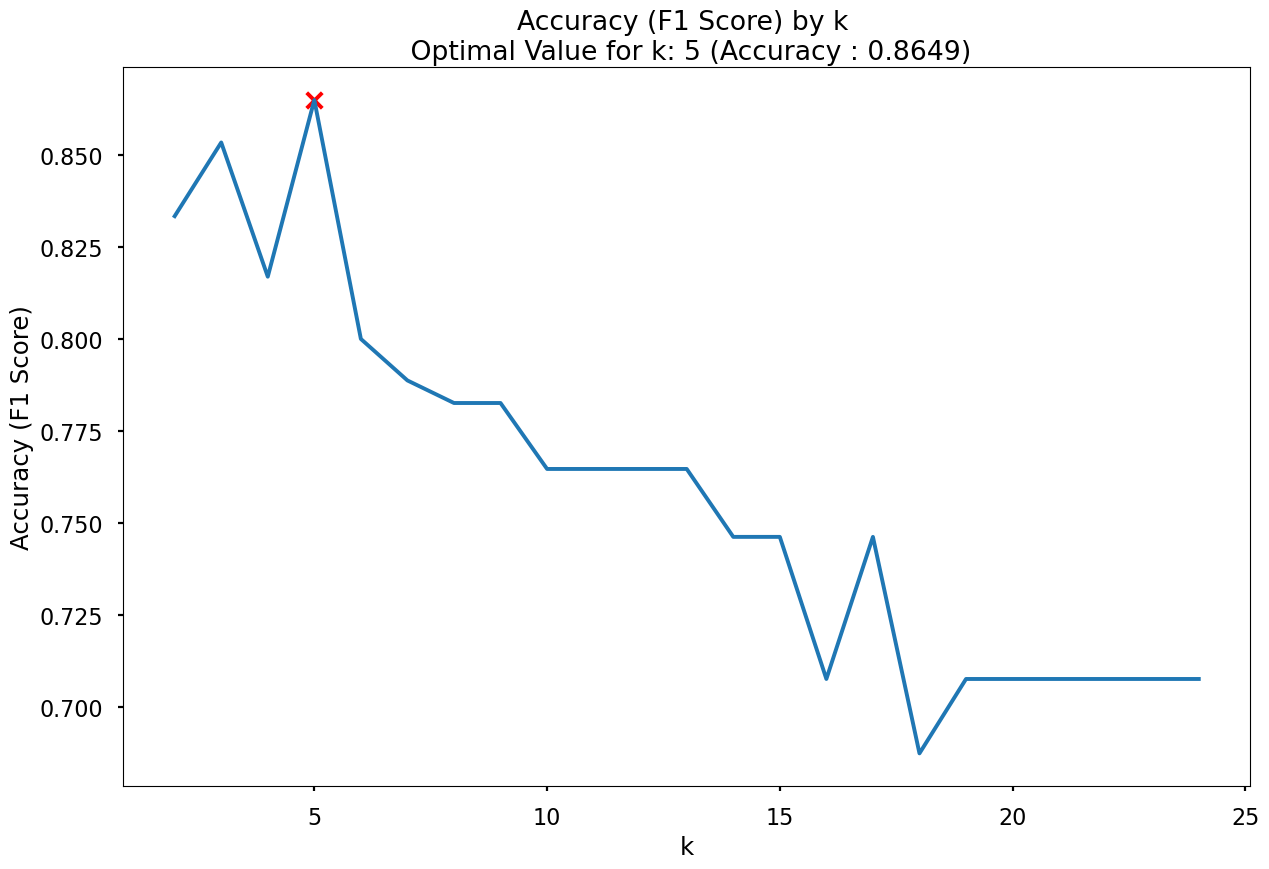

In [47]:
#plot of max depths
plt.plot(k_list,accuracy_scores)
plt.scatter(optimal_k_value,max_accuracy, marker="x", color = "red")
plt.title(f"Accuracy (F1 Score) by k \n Optimal Value for k: {optimal_k_value} (Accuracy : {round(max_accuracy,4)})")
plt.xlabel("k")
plt.ylabel("Accuracy (F1 Score)")
plt.tight_layout()
plt.show()